In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [87]:
data =pd.read_csv("C:/Users/ghate/Downloads/ott churn.csv")   # data 
data.head()

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0


In [88]:
data.shape

(2000, 16)

In [89]:
data.info

<bound method DataFrame.info of       year  customer_id  phone_no  gender  age  no_of_days_subscribed  \
0     2015       100198  409-8743  Female   36                     62   
1     2015       100643  340-5930  Female   39                    149   
2     2015       100756  372-3750  Female   65                    126   
3     2015       101595  331-4902  Female   24                    131   
4     2015       101653  351-8398  Female   40                    191   
...    ...          ...       ...     ...  ...                    ...   
1995  2015       997132  385-7387  Female   54                     75   
1996  2015       998086  383-9255    Male   45                    127   
1997  2015       998474  353-2080     NaN   53                     94   
1998  2015       998934  359-7788    Male   40                     94   
1999  2015       999961  414-1496    Male   37                     73   

     multi_screen mail_subscribed  weekly_mins_watched  minimum_daily_mins  \
0            

In [90]:
data.describe()

,year,customer_id,age,no_of_days_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
count,2000.0,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,1972.000000,2000.000000,1965.000000
mean,2015.0,554887.157500,38.69050,99.750000,270.178425,10.198700,30.620780,100.415500,4.482500,3.250507,1.547000,0.133333
std,0.0,261033.690318,10.20641,39.755386,80.551627,2.785519,9.129165,19.529454,2.487728,0.809084,1.315164,0.340021
min,2015.0,100198.000000,18.00000,1.000000,0.000000,0.000000,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.0,328634.750000,32.00000,73.000000,218.212500,8.400000,24.735000,87.000000,3.000000,3.000000,1.000000,0.000000
50%,2015.0,567957.500000,37.00000,99.000000,269.925000,10.200000,30.590000,101.000000,4.000000,3.000000,1.000000,0.000000
75%,2015.0,773280.250000,44.00000,127.000000,324.675000,12.000000,36.797500,114.000000,6.000000,4.000000,2.000000,0.000000
max,2015.0,999961.000000,82.00000,243.000000,526.200000,20.000000,59.640000,175.000000,19.000000,6.000000,9.000000,1.000000


In [91]:
cat_col = [col for col in data.columns if data[col].dtype == 'object']
print('Categorical columns :',cat_col)
# Numerical columns
num_col = [col for col in data.columns if data[col].dtype != 'object']
print('Numerical columns :',num_col)

Categorical columns : ['phone_no', 'gender', 'multi_screen', 'mail_subscribed']
Numerical columns : ['year', 'customer_id', 'age', 'no_of_days_subscribed', 'weekly_mins_watched', 'minimum_daily_mins', 'maximum_daily_mins', 'weekly_max_night_mins', 'videos_watched', 'maximum_days_inactive', 'customer_support_calls', 'churn']


In [92]:
data[data.duplicated()]   #no duplicate values

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn


In [93]:
data.isna().sum()

year                       0
customer_id                0
phone_no                   0
gender                    24
age                        0
no_of_days_subscribed      0
multi_screen               0
mail_subscribed            0
weekly_mins_watched        0
minimum_daily_mins         0
maximum_daily_mins         0
weekly_max_night_mins      0
videos_watched             0
maximum_days_inactive     28
customer_support_calls     0
churn                     35
dtype: int64

In [94]:
data.gender.value_counts()

Male      1053
Female     923
Name: gender, dtype: int64

In [95]:
data.gender.fillna('Female', inplace = True)

In [96]:
data.isna().sum()

year                       0
customer_id                0
phone_no                   0
gender                     0
age                        0
no_of_days_subscribed      0
multi_screen               0
mail_subscribed            0
weekly_mins_watched        0
minimum_daily_mins         0
maximum_daily_mins         0
weekly_max_night_mins      0
videos_watched             0
maximum_days_inactive     28
customer_support_calls     0
churn                     35
dtype: int64

In [97]:
data.maximum_days_inactive.value_counts()

3.0    945
4.0    645
2.0    273
5.0     85
1.0     12
0.0     10
6.0      2
Name: maximum_days_inactive, dtype: int64

In [98]:
data.maximum_days_inactive.mode()

0    3.0
Name: maximum_days_inactive, dtype: float64

In [99]:
data.maximum_days_inactive.fillna(data.maximum_days_inactive.mode()[0], inplace = True)

In [100]:
data.isna().sum()

year                       0
customer_id                0
phone_no                   0
gender                     0
age                        0
no_of_days_subscribed      0
multi_screen               0
mail_subscribed            0
weekly_mins_watched        0
minimum_daily_mins         0
maximum_daily_mins         0
weekly_max_night_mins      0
videos_watched             0
maximum_days_inactive      0
customer_support_calls     0
churn                     35
dtype: int64

In [101]:
data.churn.value_counts()

0.0    1703
1.0     262
Name: churn, dtype: int64

In [102]:
data.churn.fillna(1.0, inplace = True) 

In [103]:
data.isna().sum()

year                      0
customer_id               0
phone_no                  0
gender                    0
age                       0
no_of_days_subscribed     0
multi_screen              0
mail_subscribed           0
weekly_mins_watched       0
minimum_daily_mins        0
maximum_daily_mins        0
weekly_max_night_mins     0
videos_watched            0
maximum_days_inactive     0
customer_support_calls    0
churn                     0
dtype: int64

In [104]:
#handling outliers
data.head()

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0


<AxesSubplot:ylabel='age'>

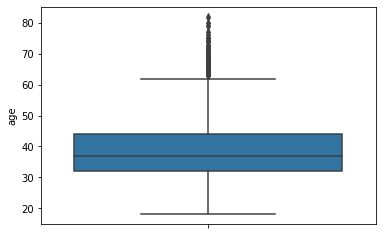

In [105]:
sns.boxplot(y='age', data=data)

<AxesSubplot:ylabel='no_of_days_subscribed'>

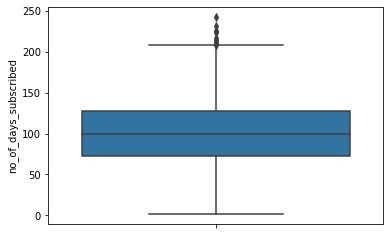

In [106]:
sns.boxplot(y='no_of_days_subscribed',data=data)

<AxesSubplot:ylabel='weekly_mins_watched'>

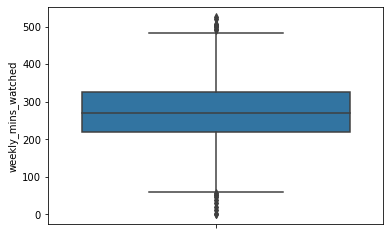

In [107]:
sns.boxplot(y='weekly_mins_watched',data=data)

In [108]:
def out_cap(col):
    q3 = col.quantile(0.75)
    q1 = col.quantile(0.25)
    
    iqr = q3-q1
    
    l_limit = q1-1.5*iqr
    u_limit = q3+1.5*iqr
    
    col = col.clip(lower = l_limit, upper = u_limit)
    return col

In [109]:
data.age.quantile(0.75)

44.0

In [110]:
data.age.quantile(0.25)

32.0

In [111]:
data.age = out_cap(data.age)

<AxesSubplot:ylabel='age'>

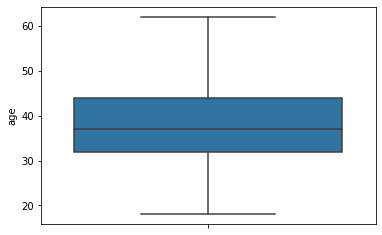

In [112]:
sns.boxplot(y='age',data=data)

In [113]:
data.no_of_days_subscribed = out_cap(data.no_of_days_subscribed)

<AxesSubplot:ylabel='no_of_days_subscribed'>

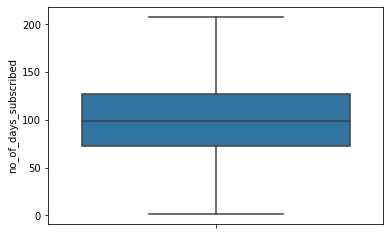

In [114]:
sns.boxplot(y='no_of_days_subscribed',data=data)

In [115]:
data.weekly_mins_watched = out_cap(data.weekly_mins_watched)

<AxesSubplot:ylabel='weekly_mins_watched'>

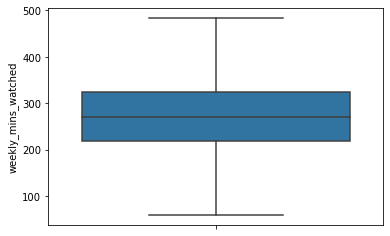

In [116]:
sns.boxplot(y='weekly_mins_watched',data=data)

In [117]:
#data transformation
data.dtypes


year                        int64
customer_id                 int64
phone_no                   object
gender                     object
age                       float64
no_of_days_subscribed     float64
multi_screen               object
mail_subscribed            object
weekly_mins_watched       float64
minimum_daily_mins        float64
maximum_daily_mins        float64
weekly_max_night_mins       int64
videos_watched              int64
maximum_days_inactive     float64
customer_support_calls      int64
churn                     float64
dtype: object

In [118]:
numeric_data = data.select_dtypes('number')  #splitting numeric and object

In [119]:
numeric_data.head()

,year,customer_id,age,no_of_days_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,36.0,62.0,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,39.0,149.0,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,62.0,126.0,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,24.0,131.0,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,40.0,191.0,243.00,10.9,27.54,83,7,3.0,1,0.0


In [120]:
obj_data = data.select_dtypes('object')
obj_data.head()

,phone_no,gender,multi_screen,mail_subscribed
0,409-8743,Female,no,no
1,340-5930,Female,no,no
2,372-3750,Female,no,no
3,331-4902,Female,no,yes
4,351-8398,Female,no,no


In [121]:
obj_data.drop('phone_no', axis=1, inplace = True)      #dropping phone number
obj_data.head()

,gender,multi_screen,mail_subscribed
0,Female,no,no
1,Female,no,no
2,Female,no,no
3,Female,no,yes
4,Female,no,no


In [122]:
obj_data.replace({'Female':0,'Male':1}, inplace = True)
obj_data.head()

,gender,multi_screen,mail_subscribed
0,0,no,no
1,0,no,no
2,0,no,no
3,0,no,yes
4,0,no,no


In [123]:
obj_data.drop('gender', axis =1, inplace = True)
obj_data.head()

,multi_screen,mail_subscribed
0,no,no
1,no,no
2,no,no
3,no,yes
4,no,no


In [124]:
obj_data.dtypes

multi_screen       object
mail_subscribed    object
dtype: object

In [125]:
obj_data.multi_screen.value_counts()

no     1802
yes     198
Name: multi_screen, dtype: int64

In [126]:
obj_data.replace({'no':0,'yes':1}, inplace = True)
obj_data.head()

,multi_screen,mail_subscribed
0,0,0
1,0,0
2,0,0
3,0,1
4,0,0


In [40]:
numeric_data.dtypes

year                        int64
customer_id                 int64
age                       float64
no_of_days_subscribed     float64
weekly_mins_watched       float64
minimum_daily_mins        float64
maximum_daily_mins        float64
weekly_max_night_mins       int64
videos_watched              int64
maximum_days_inactive     float64
customer_support_calls      int64
churn                     float64
dtype: object

In [127]:
features = pd.concat([numeric_data, obj_data], axis = 1)
features.head()

,year,customer_id,age,no_of_days_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn,multi_screen,mail_subscribed
0,2015,100198,36.0,62.0,148.35,12.2,16.81,82,1,4.0,1,0.0,0,0
1,2015,100643,39.0,149.0,294.45,7.7,33.37,87,3,3.0,2,0.0,0,0
2,2015,100756,62.0,126.0,87.30,11.9,9.89,91,1,4.0,5,1.0,0,0
3,2015,101595,24.0,131.0,321.30,9.5,36.41,102,4,3.0,3,0.0,0,1
4,2015,101653,40.0,191.0,243.00,10.9,27.54,83,7,3.0,1,0.0,0,0


In [128]:
features.drop(['year', 'customer_id'], axis = 1, inplace = True)
features.head()

,age,no_of_days_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn,multi_screen,mail_subscribed
0,36.0,62.0,148.35,12.2,16.81,82,1,4.0,1,0.0,0,0
1,39.0,149.0,294.45,7.7,33.37,87,3,3.0,2,0.0,0,0
2,62.0,126.0,87.30,11.9,9.89,91,1,4.0,5,1.0,0,0
3,24.0,131.0,321.30,9.5,36.41,102,4,3.0,3,0.0,0,1
4,40.0,191.0,243.00,10.9,27.54,83,7,3.0,1,0.0,0,0


In [129]:
features.shape

(2000, 12)

In [130]:
#dividing the dataset

In [131]:
X = features.drop('churn', axis = 1)

In [132]:
X.head()

,age,no_of_days_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,multi_screen,mail_subscribed
0,36.0,62.0,148.35,12.2,16.81,82,1,4.0,1,0,0
1,39.0,149.0,294.45,7.7,33.37,87,3,3.0,2,0,0
2,62.0,126.0,87.30,11.9,9.89,91,1,4.0,5,0,0
3,24.0,131.0,321.30,9.5,36.41,102,4,3.0,3,0,1
4,40.0,191.0,243.00,10.9,27.54,83,7,3.0,1,0,0


In [133]:
y = features.churn
y.head()

0    0.0
1    0.0
2    1.0
3    0.0
4    0.0
Name: churn, dtype: float64

In [134]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)    # splitting into 80-20 ratio
X_train

,age,no_of_days_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,multi_screen,mail_subscribed
897,42.0,94.0,245.25,12.6,27.80,82,5,4.0,1,0,0
412,26.0,118.0,231.90,12.6,26.28,102,5,4.0,2,0,0
1552,30.0,189.0,341.10,6.3,38.66,120,4,2.0,2,0,0
1042,34.0,48.0,297.30,5.1,33.69,73,5,2.0,1,0,0
1588,38.0,130.0,274.50,9.5,31.11,78,19,3.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
914,62.0,133.0,243.15,12.2,27.56,78,5,4.0,1,0,0
1834,33.0,113.0,310.80,9.9,35.22,87,1,3.0,1,0,0
542,31.0,36.0,266.85,10.8,30.24,102,6,3.0,2,0,0
21,32.0,170.0,369.60,9.1,41.89,95,8,3.0,0,0,0


In [135]:
y_train

897     0.0
412     0.0
1552    0.0
1042    0.0
1588    0.0
       ... 
914     0.0
1834    0.0
542     0.0
21      0.0
1767    0.0
Name: churn, Length: 1600, dtype: float64

In [136]:
X_test

,age,no_of_days_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,multi_screen,mail_subscribed
82,39.0,103.0,240.30,9.7,27.23,97,2,3.0,0,0,0
726,62.0,161.0,267.15,8.5,30.28,78,2,3.0,1,0,0
794,37.0,83.0,117.75,11.8,13.35,102,4,4.0,1,0,1
1121,35.0,126.0,317.40,7.8,35.97,60,1,3.0,1,0,0
673,38.0,130.0,264.45,11.3,29.97,123,5,4.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1567,28.0,99.0,213.45,9.1,24.19,114,1,3.0,0,0,0
303,51.0,111.0,219.30,8.7,24.85,116,3,3.0,3,0,0
1852,62.0,58.0,352.20,9.9,39.92,122,6,3.0,0,0,0
1829,49.0,104.0,275.40,12.7,31.21,112,2,4.0,1,0,0


In [137]:
y_test

82      1.0
726     0.0
794     0.0
1121    0.0
673     0.0
       ... 
1567    0.0
303     0.0
1852    0.0
1829    0.0
886     0.0
Name: churn, Length: 400, dtype: float64

In [138]:
#data modelling

In [139]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [140]:
log_reg.fit(X_train, y_train)

LogisticRegression()

In [141]:
log_reg.predict(X_test)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [142]:
log_reg.score(X_test, y_test)

0.84

In [143]:
from sklearn.tree import DecisionTreeClassifier    #checking for another data model
dec_tree = DecisionTreeClassifier()

In [144]:
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [145]:
dec_tree.predict(X_test)

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0.

In [146]:
dec_tree.score(X_test, y_test)

0.835